<a href="https://colab.research.google.com/github/vaskot1986/03MAIR--Algoritmos-de-Optimizacion--2020/blob/master/Arnau_Vazquez_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre:** Arnau Vazquez Giner

**Url Colab:** https://colab.research.google.com/drive/1z1uMETeULHm8-4KN9SifIyeTxXE7RkwT?usp=sharing

**Url Github:** 

In [1]:
TARIFAS = [
           [0,5,4,3,999,999,999],
           [999,0,999,2,3,999,11],
           [999,999,0,1,999,4,10],
           [999,999,999,0,5,6,9],
           [999,999,999,999,0,999,4],
           [999,999,999,999,999,0,3],
           [999,999,999,999,999,999,0]
]

def Precios(TARIFAS):
  N = len(TARIFAS[0])
  PRECIOS = [[9999]*N for i in [9999]*N]
  RUTA = [[""]*N for i in [""]*N] 

  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i,j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
          MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j])
          RUTA[i][j]=k
        PRECIOS[i][j]= MIN
    

  return PRECIOS,RUTA

def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta]))+','+str(RUTA[desde][hasta])

PRECIOS,RUTA = Precios(TARIFAS)
print(RUTA)
print("\nLa ruta es:")
calcular_ruta(RUTA, 0, 6)

[['', 0, 0, 0, 1, 2, 5], ['', '', 1, 1, 1, 3, 4], ['', '', '', 2, 3, 2, 5], ['', '', '', '', 3, 3, 3], ['', '', '', '', '', 4, 4], ['', '', '', '', '', '', 5], ['', '', '', '', '', '', '']]

La ruta es:


'0,0,2,5'

La ruta más barata podemos ver que es con el origen 0 pasar por el nodo 2, del 2 pasar al 5. Desde el 5 la única opción que queda es el 6. 
El coste total es 11.

In [6]:
#Ramificacion y poda
#Matriz de costes del problema
COSTES = [
          [11,12,18,40],
          [14,15,13,22],
          [11,17,19,23],
          [17,14,20,28]
]

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range (len(COSTES)):
    if i not in S:
      VALOR += min([COSTES[j][i] for j in range(len(S),len(COSTES))])
  return VALOR

#Funcion estimacion costes
#i=agente y S[i]=tarea  S(3,0,2,3)->agente 0 tarea 3, agente 1 tarea 0, etc...
def valor(S,COSTES):
  VALOR = 0
  #Valores 
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(COSTES) ):
    if i not in S:
      VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES)) ])
  return VALOR

def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N):
    if i not in NODO:
      HIJOS.append({'s':NODO+(i,)})
  return HIJOS

def ramificacion_y_poda(COSTES):
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple(i for i in range(len(COSTES)))
  CotaSup = valor(MEJOR_SOLUCION,COSTES)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)})

  iteracion = 0

  while(len(NODOS) > 0):
    iteracion +=1
     
    nodo_prometedor = [ min(NODOS,key=lambda x:x['ci']) ][0]['s']

    #RAMIFICACION
    HIJOS =[ {'s':x['s'],'ci':CI(x['s'],COSTES)} for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #REVISAMOS COTA SUPERIOR Y NOS QUEDAMOS CON LA MEJOR SOLUCION
    NODO_FINAL=[x for x in HIJOS if len(x['s']) == DIMENSION]
    if len(NODO_FINAL) > 0:
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #PODA
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS = [x for x in NODOS if x['s'] != nodo_prometedor]

  print("La solucion final es:", MEJOR_SOLUCION, " en ", iteracion, " iteraciones", " para dimension: ", DIMENSION)

ramificacion_y_poda(COSTES)



La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}]  en  14  iteraciones  para dimension:  4


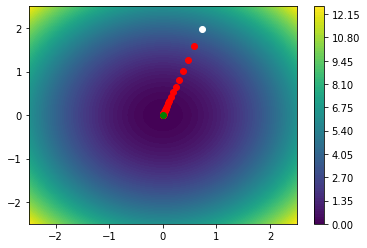

Solucion: [2.575909067533064e-49, 6.972552870710272e-49] 5.52518010590491e-97


In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

import random

f = lambda X: X[0]**2+X[1]**2 #FUncion
df = lambda X: [2*X[0] , 2*X[1]] #Gradiente

#Preparacion dataos para mapa de niveles en Z
resolucion = 100
rango = 2.5
X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio
P=[random.uniform(-2,2),random.uniform(-2,2)]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizage
TA=.1

#Iteraciones
for _ in range(500):
  grad = df(P)
  P[0],P[1] = P[0] - TA*grad[0],P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#pintar grafico
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:", P , f(P))